# airbnb.db EDA - Reviews Table

The table `reviews` contains data relevant to the experience of tenants that have rented from a given Airbnb listing. Let's take a look at the variables that each entry in the `reviews` contains:

In [1]:
%matplotlib inline

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection to the database
connection = sqlite3.connect('airbnb.db')
cursor = connection.cursor()

In [3]:
# Read sqlite query results into a pandas DataFrame
airbnbListings = pd.read_sql_query("SELECT * from reviews", connection)
airbnbListings = airbnbListings.drop_duplicates(subset='id', keep="first")
# List the columns in the reviews table
print(airbnbListings.columns)

Index(['source_name', 'listing_id', 'id', 'date', 'reviewer_id',
       'reviewer_name', 'comments'],
      dtype='object')


Looking at columns in the reviews table, it would appear that each entry would be similar to the types of reviews you might find on Amazon or Yelp. Each review has an associated reviewer (reviewer_name & reviewer_id), as well as the date of when it was posted to denote its relevance. Lastly there's the comment itself that would describe the reviewers experience and the listing_id which points directly to the airbnb listing they rented.

Now that we have verified the relavance of the columns in the table, let's now take a look at the overall characteristics of the data.

In [4]:
airbnbListings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387813 entries, 0 to 1269065
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   source_name    387813 non-null  object
 1   listing_id     387813 non-null  int64 
 2   id             387813 non-null  int64 
 3   date           387813 non-null  object
 4   reviewer_id    387813 non-null  int64 
 5   reviewer_name  387813 non-null  object
 6   comments       387813 non-null  object
dtypes: int64(3), object(4)
memory usage: 23.7+ MB


There are 330237 records (or observations) for each variable so there are no missing values. there are 3 numerical variables and what appears to be 3 categorical variables. Let's look at the first few rows:

In [5]:
airbnbListings.head()

,source_name,listing_id,id,date,reviewer_id,reviewer_name,comments
0,reviews_3_2023,3686,131293,2010-11-01,257234,Callie,Staying with Levita and her wonderful family w...
1,reviews_3_2023,3686,150766,2010-12-08,255888,Patrick,"Vita is a very welcoming, helpful and friendly..."
2,reviews_3_2023,3686,177749,2011-02-02,366688,Benjamin,"This was my first time using ""airbnb"" and it m..."
3,reviews_3_2023,3686,197451,2011-03-12,213492,T.J.,"First, Vita saved my work week by providing me..."
4,reviews_3_2023,3686,213212,2011-03-30,428455,Pete,Great host! Very welcoming and organised. I st...


What I find most interesting from dataframe preview is that the reviewer_name is just the first name of the reviewer. This can be slightly confusing considering there may be multiple people that share the same name but a different reviewer_id. Another point of interest is that date seems to have the capability to be measured down to the second, however it seems to only be measured down to the day. Lastly it will be hard to guage the significance of each comment, what is the character limit? Can we make sense of the sentiment of the comment? How can we tell if it is a positive or negative comment?

---

# EDA

## Single Variable EDA

We'll start our EDA by looking at each variable individually, starting with source_name *id*.

## source_name

The variable source_name refers to the excel sheet that the comment was pulled from. It is a categorical variable that is a string. When constructing the database, we pulled from 4 separate excel sheets for the 4 different quarters of the past year. The excel sheets are as listed: reviews_3_2023, reviews_6_2022, reviews_9_2022, and reviews_12_2022. This would mean that there are only 4 different values that source_name could possibly be. 

I would anticipate that the reviews_3_2023 will have the highest frequency because if any descriptions get changed on the listings, then the review's date will update. 

In [6]:
airbnbListings.source_name.describe()

count             387813
unique                 4
top       reviews_3_2023
freq              330237
Name: source_name, dtype: object

As noted, there are 4 different unique values which represent the 4 unique excel sheet we populated our database from. The highest frequency is also reviews_3_2023 which is what we forecasted due to updated listings. Let's now visualize the frequency of each source_name:

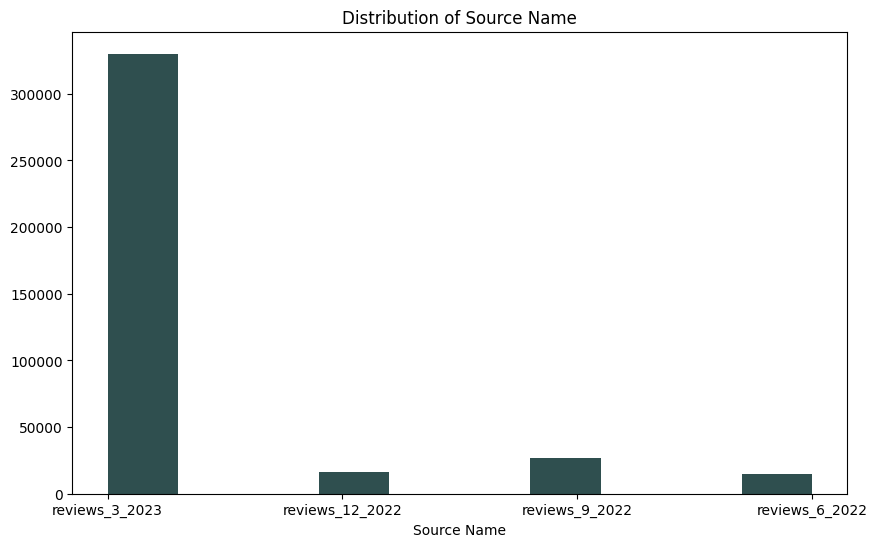

In [7]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(airbnbListings.source_name, color="darkslategray")
axes.set_title("Distribution of Source Name")
axes.set_xlabel("Source Name")

plt.show()
plt.close()

Looking at the distribution, it aligns with our assumption that reviews_3_2023 would have the highest density. It is also interesting how there is very little densities with the other 3 categories. This may need further exploration to explain why the distribution is so concentrated with reviews_3_2023. Since a majority of the rows are from reviews_3_2023, this variable may not be a good candidate for our model.

## id

I'm assuming that id is the unique id for each associated review. That would mean each review gets an id (which we previously found true, 330237 non-null int64) and each review should have a unique id (no duplicates).

id is a numerical data type however there are no units so the numbers are arbitrary. The only significance of the number should be that they are all unique. Let's see the range of values that id could be:

In [8]:
airbnbListings.id.describe()

count    3.878130e+05
mean     2.537451e+17
std      3.154293e+17
min      4.980000e+02
25%      3.272933e+08
50%      6.433958e+08
75%      5.920005e+17
max      8.500703e+17
Name: id, dtype: float64

id is not a measurement so we only care about the min and max values from the values above. It would appear that the min is 2215 and the max is 8.500703e+17. The difference in magnitude between the min and max would suggest that each id is random. There may be some sort of hash function to generate each one. It makes no sense to plot the ids just due to how spread out the data it is but we can ensure that there are no duplicate values.

In [9]:
airbnbListings.id.is_unique

True

To this point we have found that each id appears to be random (difference in magnitude between min and max value) and we have verified that each id is unique for each entry in the table. Given a id, we could find the specific row in the table that it is associated with. I do not believe it will be of any value when looking for pairwise relationships going forward.

## listing_id

listing_id refers to the specific Airbnb listing that the reviewer has rented from. Typically, when a customer leaves a comment, there is an associate listing that they are referring to. Since a listing could be rented numerous times, I would expect to see multiple duplicates in the dataset.

In [10]:
airbnbListings.listing_id.describe()

count    3.878130e+05
mean     2.809888e+16
std      1.318591e+17
min      3.571000e+03
25%      1.186628e+07
50%      2.142290e+07
75%      3.814941e+07
max      8.473482e+17
Name: listing_id, dtype: float64

listing_id is not a measurement so we only care about the min and max values from the values above. It would appear that the min is 3571 and the max is 8.473482e+17. The difference in magnitude between the min and max would suggest that each id is random. There may be some sort of hash function to generate each one. It makes no sense to plot the ids just due to how spread out the data is. Let's see how many duplicates there are and how many there are.

In [11]:
airbnbListings['listing_id'].value_counts().describe()

count    6432.00000
mean       60.29431
std        90.27492
min         1.00000
25%         6.00000
50%        24.00000
75%        74.25000
max       898.00000
Name: listing_id, dtype: float64

Looking at the data above, there is a listing that has 898 reviews. That would be the most number of reviews for a listing. There are also listings with 1 reviews. That would be the minimum number of reviews for a listing. On average ther is typically 60 reviews per listing. This would seem like a considerable amount of reviews. Let's actually visualize the number of reviews per listing.

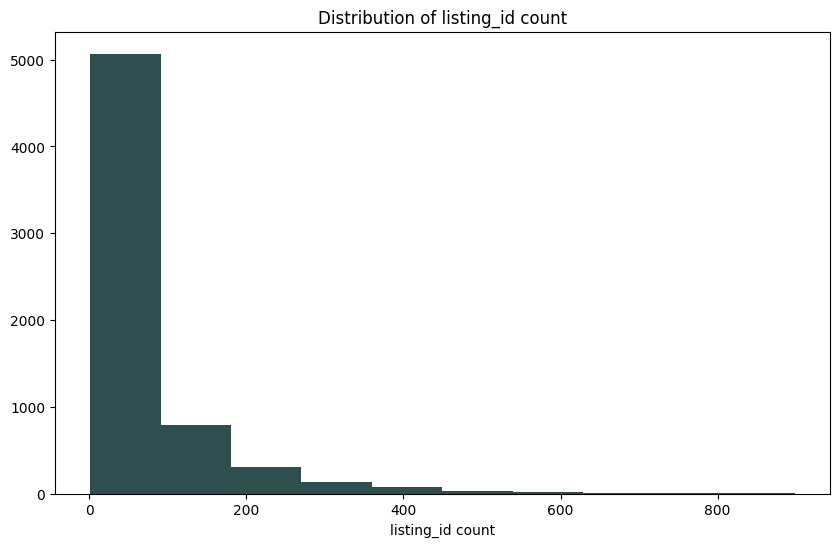

In [12]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(airbnbListings['listing_id'].value_counts(), color="darkslategray")
axes.set_title("Distribution of listing_id count")
axes.set_xlabel("listing_id count")

plt.show()
plt.close()

The distribution above gives a good idea of how many reviews each listing will typically get. On average, it would seem that most listings receive 100 or less reviews, there are a few outliers that have 200+ reviews. This may not be important when constructing the model.

## date

The date variable refers to the day that the review was posted. Date can be a numerical value because time is a measurement. Since we are strictly looking at the quarters between June 2022 to March 2023. Since we previously found that most of the reviews come from 1st quarter in 2023, we should expect to find that a majority of the date values should be between Jan 2023 to March 2023.

In [13]:
airbnbListings['date'].describe()

count         387813
unique          4399
top       2022-04-24
freq             706
Name: date, dtype: object

It should be noted, that there were 706 reviews left on April 24, 2022 which is interesting. That day does not seem to be a holiday but it is a Sunday. I would expect that the most popular date would be a holiday because that is typically when people are traveling and staying at Airbnb's. It does make sense that it is a Sunday because that is the last day of a weekend trip. Let's see if we can visualize the data.

Since just 'date', may be too granular, let's take a look at the year distribution.

In [14]:
def categorise(row):  
    date = row['date']
    
    date = date.split("-")
    
    return int(date[0])

airbnbListings['date_year'] = airbnbListings.apply(lambda row: categorise(row), axis=1)

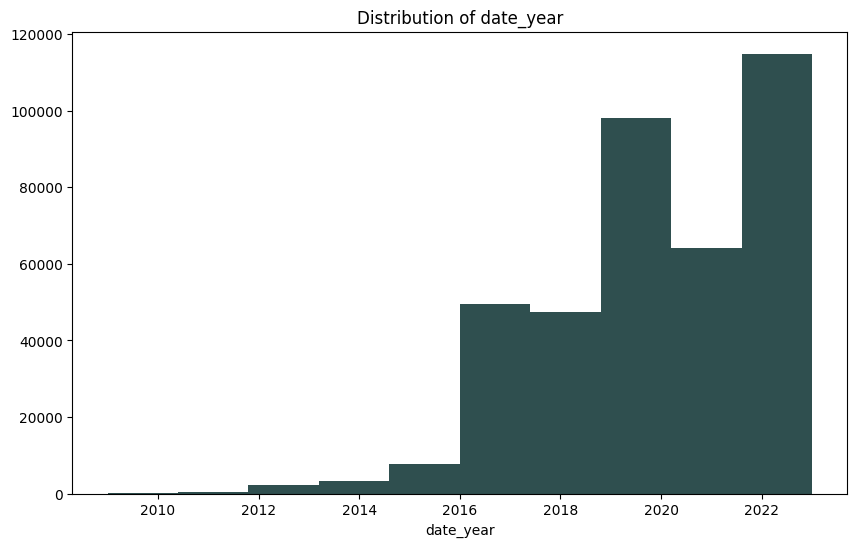

In [15]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(airbnbListings['date_year'], color="darkslategray")
axes.set_title("Distribution of date_year")
axes.set_xlabel("date_year")

plt.show()
plt.close()

This distribution is very confusing. I thought that the data collected was just between June 2022 and March 2023 which is the past fiscal year. However this is not the case when looking at the years. It would seem that the oldest comments go back to 2010 and the newest comments come from 2023. A majority of the reviews are within the past 5 years. But I really am not sure why the reviews can be so old if the data is from the past year. If this cannot be explained, then it may not be the best variable to use in the final model.

## reviewer_id

The variable reviewer_id refers to the unique id that each Airbnb user is given. Since a user can leave multiple reviews on the app, we do expect to see duplicates in the reviewer_id column. Since we've seen previously that date extends to the lifetime of the app so we should expect a large number of duplicates. For any give user I believe it would be resonable to see 10-50 duplicates. This would mean the average user has left 10-50 reviews in their lifetime. Let's actually see the distribution of reviews.

In [16]:
airbnbListings['reviewer_id'].value_counts().describe()

count    349259.000000
mean          1.110388
std           0.583008
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          68.000000
Name: reviewer_id, dtype: float64

This is incredibly interesting. The reviewer_id is almost nearly unique for each and every row. As we've seen, the average user has left 1.11 reviews in their lifetime. One user has left 68 reviews in his/her lifetime. But it makes sense that a majority of users have exactly 1 review. If the min was a number like 0.5 then we might have an issue because a user cannot leave a fractional review. Let's actually visualize the data.

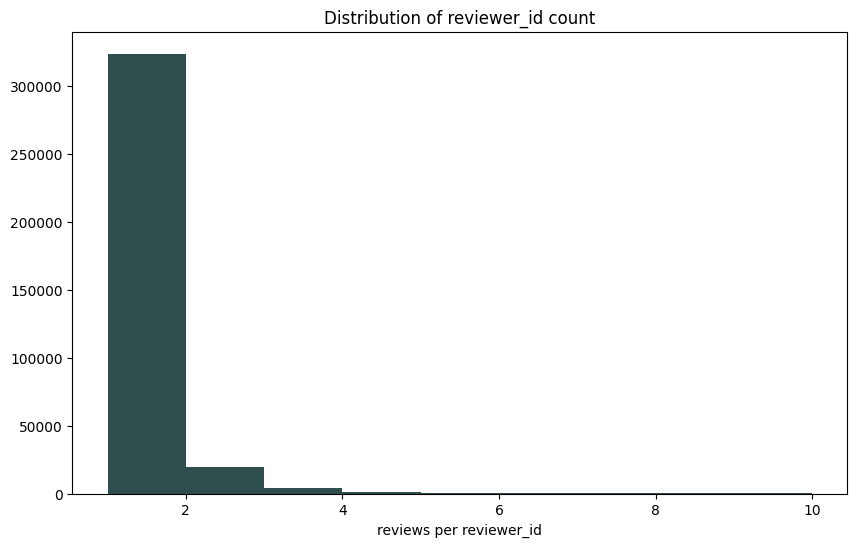

In [17]:
figure = plt.figure(figsize=(10, 6))
data = airbnbListings['reviewer_id'].value_counts()
binwidth = 1
axes = figure.add_subplot(1, 1, 1)
axes.hist(data, color="darkslategray", bins=range(min(data), min(data) + 10, binwidth))
axes.set_title("Distribution of reviewer_id count")
axes.set_xlabel("reviews per reviewer_id")

plt.show()
plt.close()

As seen in the distribution before, most users have left only 1 review. A small fraction have left 2-4, and almost none have left 5 or more reviews. This is very interesting, because I would have assumed that most users would leave multiple reviews since it might be common for someone to rent from multiple airbnbs in their lifetime. This could be true. There could be a strong possibility that the sample of all airbnb records was taken at random which could make it unlikely to see a multiple reviews from a user. However this could be proven false due to one user having 85 total reviews.

## reviewer_name

The reviewer_name variable refers to just the first name of a given reviewer. It is not unique and there is a high possibility of duplicate values in this row. Given that this data seems to be predominantly from the US, I would expect that the most common names would align with the most common names in the US. The dataset seems to be random enough so that the most common names would not have a regional correlation. Lets find out the most common names.

In [18]:
name_count = airbnbListings['reviewer_name'].value_counts()
name_count.head()

Michael     3329
David       3252
Sarah       2731
John        2640
Jennifer    2216
Name: reviewer_name, dtype: int64

Looking at the data, there are 3329 reviewers named Michael, 3252 named David, 2731 named Sarah, etc. This aligns with our assumptions. All these names are popoular names within the US and it makes the most sense that they are the most common names in the database. Let's look at how frequency the average name is.

In [19]:
name_count.describe()

count    51977.000000
mean         7.461242
std         60.266840
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       3329.000000
Name: reviewer_name, dtype: float64

On average there are 7 reviews from users with the same first name. As we previously found, the average users leaves 1.11 reviews, so we could conclude that a majority of duplicate names are seperate and distinct people.

Instead of plotting the data let's look at the extremes of the dataset to get an idea of the possible values:

In [20]:
name_count.head(-10)

Michael                3329
David                  3252
Sarah                  2731
John                   2640
Jennifer               2216
                       ... 
Aaron &Amp; Shellie       1
Tsuchimoto                1
Efrosini                  1
Tyris                     1
Ebuwa                     1
Name: reviewer_name, Length: 51967, dtype: int64

The most frequent names in the dataset are not of concern. However it is extremely concerning looking at the least common names in the dataset. I cannot make any sense of the name 'Aaron &Amp; Shellie'. Maybe the user made a mistake when inputting their name. This might be hard to believe because there are typically checks before a user can make an account. Mayber there was an error in reading in the data to the database. The other names could infer that not all the data collected is from US locations.

## comments

The comment variable refers to the comment that was actually left in the review. The value should be a short description of the reviewers experience in the associated listing. There should not be any empty values because it would not make any sense to leave an empty review. There may be a few duplicates however I expect to see nearly all the values to be unique.

In [21]:
comment_count = airbnbListings['comments'].value_counts()
comment_count.head()

Great place!       476
Great stay!        415
.                  400
Great place        396
Great location!    379
Name: comments, dtype: int64

As we expected, there are plenty of duplicate values in our database. The most common occurences are "Great place!", "Great stay!", "Great place", "Great Location". It is reassuring to see that the most common comments are predominantly positive. It would be incredibly concerning to see that the most common comments are negative. Let's actually extend our view to see if we can find the most common negative comment.

In [22]:
comment_count.head(25)

Great place!                                                                                476
Great stay!                                                                                 415
.                                                                                           400
Great place                                                                                 396
Great location!                                                                             379
Great location                                                                              319
Great place to stay!                                                                        288
Great stay                                                                                  286
Great                                                                                       200
Great!                                                                                      198
Great place to stay                     

While looking at a larger sample, there are 2 things to note. The first thing to note is the automatic posting which is interesting to see. We might have to remove these automated posts from the database because they is no real person behind the posting. The next thing to notice is that there are 400 comments just containing "." and 70 comments just containing "N/A". Maybe these are mistakes, but why would a person go through the effor of seding a review if they are not going to say anything. 

# Pairwise EDA
## Price v. ?

Since our target variable is Price, we will be analyzing the correlation of price between some of our variables found in reviews. We will not analyze all variables because most of them do not make sense in a final model. The variables we will analyze include:

* source_name
* date
* reviewer_name
* comments

The price of each Airbnb is not currently in our dataframe. It is also not in the reviews table. It can be found in the listings table. This would mean we need to perform a left join between the reviews table and the listings table so that we can match each review to the listing's associate price.

In [23]:
airbnbListings = pd.read_sql_query("""

SELECT reviews.*, listings.price
FROM reviews
LEFT JOIN listings
ON reviews.listing_id = listings.id;

""", connection)

In [24]:
airbnbListings = airbnbListings.drop_duplicates(subset='id', keep="first")
# List the columns in the reviews table
print(airbnbListings.columns)

Index(['source_name', 'listing_id', 'id', 'date', 'reviewer_id',
       'reviewer_name', 'comments', 'price'],
      dtype='object')


Let's verify that the join has been done correctly, we should expect to see the same number of entries as before.

In [25]:
airbnbListings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387813 entries, 0 to 4783891
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   source_name    387813 non-null  object
 1   listing_id     387813 non-null  int64 
 2   id             387813 non-null  int64 
 3   date           387813 non-null  object
 4   reviewer_id    387813 non-null  int64 
 5   reviewer_name  387813 non-null  object
 6   comments       387813 non-null  object
 7   price          387813 non-null  object
dtypes: int64(3), object(5)
memory usage: 26.6+ MB


As we can see there is still 387813 rows in the dataframe which means no rows have been added or removed. This means we have performed a successful join operation. Let's make sure the price column has been populated though.

In [26]:
airbnbListings.head()

,source_name,listing_id,id,date,reviewer_id,reviewer_name,comments,price
0,reviews_3_2023,3686,131293,2010-11-01,257234,Callie,Staying with Levita and her wonderful family w...,$67.00
4,reviews_3_2023,3686,150766,2010-12-08,255888,Patrick,"Vita is a very welcoming, helpful and friendly...",$67.00
8,reviews_3_2023,3686,177749,2011-02-02,366688,Benjamin,"This was my first time using ""airbnb"" and it m...",$67.00
12,reviews_3_2023,3686,197451,2011-03-12,213492,T.J.,"First, Vita saved my work week by providing me...",$67.00
16,reviews_3_2023,3686,213212,2011-03-30,428455,Pete,Great host! Very welcoming and organised. I st...,$67.00


As we can see, the price column has been successfully populated, we can now perform pairwise EDA now that all of our variables are listed in the same dataframe.

## prices v. source_name

As we have seen previously, source_name is a categorical variable with four possible values. It denotes what sheet the reviews is referenced from when it is read into the database.

In [27]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)
        
describe_by_category(airbnbListings, "price", "source_name", transpose=True)

source_name reviews_12_2022 reviews_3_2023 reviews_6_2022 reviews_9_2022
count                 15954         330237          14613          27009
unique                  173            470            186            227
top                 $192.00        $100.00        $118.00        $150.00
freq                   1813          13156            526           1044


It's hard to draw any conclusions from the data above. It may suggest there is a uniform distribution of price across each source_name. Lets be sure and plot the data.

In [28]:
def categorise(row):  
    data = row['price']
    
    data = data.replace("$","").replace(",","")
    
    return float(data)

airbnbListings['price_int'] = airbnbListings.apply(lambda row: categorise(row), axis=1)

grouped = airbnbListings.groupby("source_name")


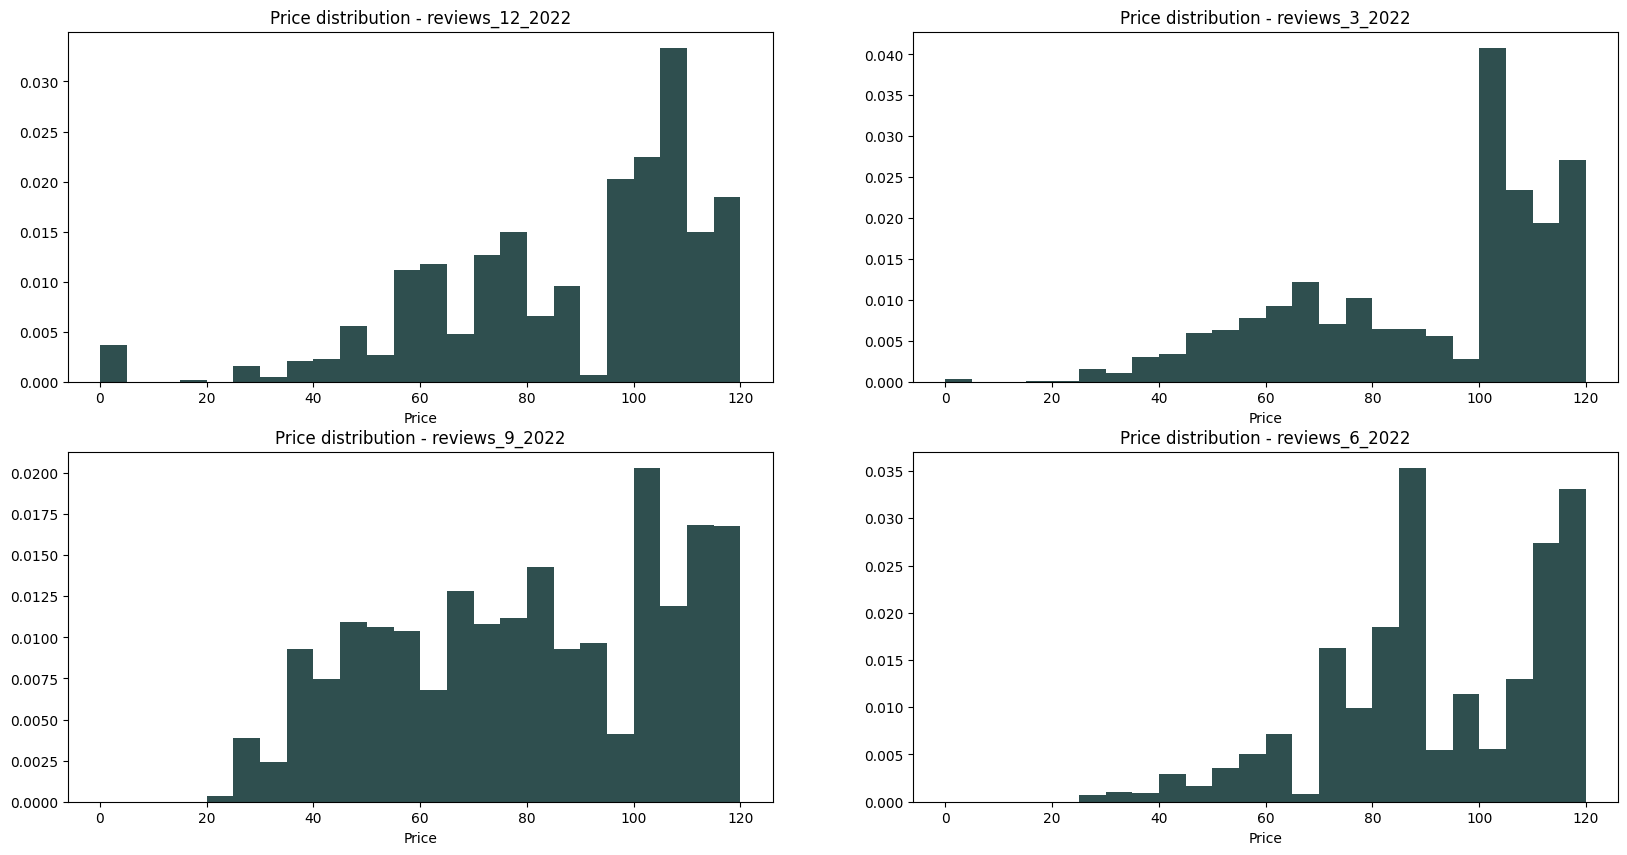

In [29]:
figure = plt.figure(figsize=(20, 10))
binwidth = 5
axes = figure.add_subplot(2, 2, 1)
axes.hist(grouped["price_int"].get_group("reviews_12_2022"),bins=range(0, 125, binwidth),color="darkslategray",density=True)
axes.set_title("Price distribution - reviews_12_2022")
axes.set_xlabel("Price")


axes = figure.add_subplot(2, 2, 2)
axes.hist(grouped["price_int"].get_group("reviews_3_2023"),bins=range(0, 125, binwidth),color="darkslategray",density=True)
axes.set_title("Price distribution - reviews_3_2022")
axes.set_xlabel("Price")


axes = figure.add_subplot(2, 2, 3)
axes.hist(grouped["price_int"].get_group("reviews_9_2022"),bins=range(0, 125, binwidth),color="darkslategray",density=True)
axes.set_title("Price distribution - reviews_9_2022")
axes.set_xlabel("Price")


axes = figure.add_subplot(2, 2, 4)
axes.hist(grouped["price_int"].get_group("reviews_6_2022"),bins=range(0, 125, binwidth),color="darkslategray",density=True)
axes.set_title("Price distribution - reviews_6_2022")
axes.set_xlabel("Price")


plt.show()
plt.close()

Looking at the plots it appears that each distribution is incredibly similar to the others. There are subtle differences but the distributions are all incredibly similar. This would suggest that there is no strong correlation between prices and source of the review. This makes sense because we are assuming we are adding random data to the dataframe so it's source file should not have a severe correlation with price.

## prices v. date

As we have previously noted, date can be a confusing variable. It was assumed that date would be between 2022 and 2023 because we were looking at the data from the past year. However, date extends nearly 10 years. Since it is so sparse, we will look at date vs year. This will make it slightly easier to plot. Let's look first at correlation coefficients even though the relationship may not be linear or monotonic.

In [30]:
def categorise(row):  
    date = row['date']
    
    date = date.split("-")
    
    return int(date[0])

airbnbListings['date_year'] = airbnbListings.apply(lambda row: categorise(row), axis=1)

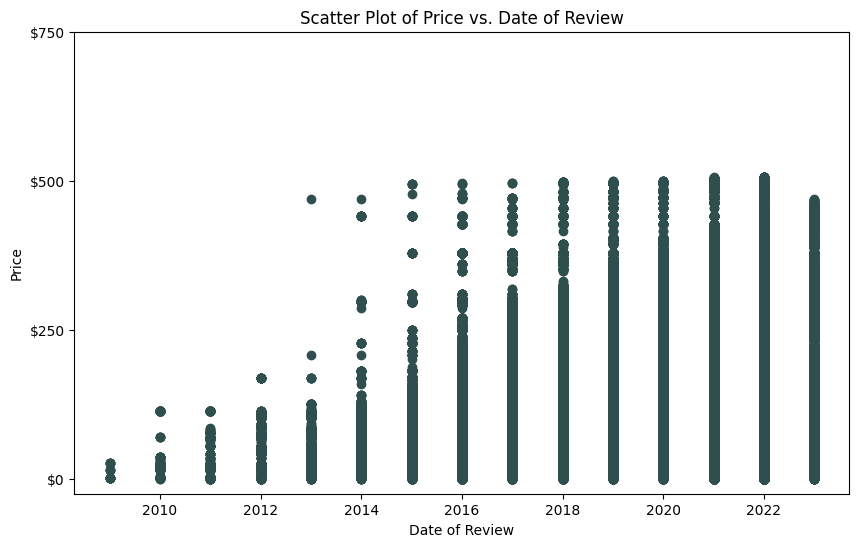

In [31]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(airbnbListings.date_year, airbnbListings.price, marker="o", color="darkslategray")
y = [0, 250, 500, 750]
ticks = ['$0', '$250', '$500', '$750']
plt.yticks(y, ticks)
axes.set_ylabel("Price")
axes.set_xlabel("Date of Review")
axes.set_title("Scatter Plot of Price vs. Date of Review")

plt.show()
plt.close()

There appears to be a small correlation between date of review and the price. The plot above would suggest that max price would increase as the year increases. It needs to be noted that this is the max price. This plot is not suggestive of the average price. Since we cannot make any strong conclusion about the average price based on year, it may not be a great variable for our final model. 

## prices v. reviewer_name

As we have seen previously, reviewer_name is an interesting variable because repeat names could be duplicates however, it is fairly unlikely. It may be tough to plot any relationship between name and prices due to how many unique values there are. We may need to split the dataframe up and plot only certain variables.

In [32]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)
        
describe_by_category(airbnbListings, "price", "reviewer_name", transpose=True)

reviewer_name      123 #Viajan2   'Hafie (Angela) Yun (Elijah) Rajeev  \
count                1        1        1            1               1   
unique               1        1        1            1               1   
top            $299.00   $49.00  $105.00      $490.00         $103.00   
freq                 1        1        1            1               1   

reviewer_name (Email Hidden By Airbnb) (Email Hidden By Airbnb)Miguel  \
count                                2                              1   
unique                               2                              1   
top                            $119.00                         $80.00   
freq                                 1                              1   

reviewer_name (Email hidden by Airbnb) (Emily) Rae (Frances) Anne  ...  \
count                                5           1              1  ...   
unique                               5           1              1  ...   
top                            $175.00     $25

Looking at the data provided above, there seems to be no correlation between reviewer name and the price of the listing they paid for. For names with a high frequencey such as Sara, the price seems to be closer to the mean but I believe this can be explained by regression. More samples suggests that the price would get closer and closer to our expected mean. I do not believe any chart could make any other suggestions about possible correlations for our final model.

## prices v. comments

The variable comments is very similar to what we found for reviewer name. It is predominantly unique values, however there are a significant number of duplicates. It may be tough to plot any relationship between comments and prices due to how many unique values there are. We may need to split the dataframe up and plot only certain variables.

In [33]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)
        
describe_by_category(airbnbListings, "price", "comments", transpose=True)

comments        0        1     3.5      4.5  \
count           1        2       1        1   
unique          1        2       1        1   
top       $183.00  $110.00  $44.00  $207.00   
freq            1        1       1        1   

comments \n<br/>\n<br/>\n<br/> \n<br/>\n<br/>We had an excellent stay in DC, a big part of it thanks to our lovely host and her historic home.  We truly felt like Washingtonians and enjoyed exploring the neighborhood and fun and funky H Street.  Mary spoiled us with Asian doughnuts for breakfast, she provided a parking permit for our rental car, and was available for anything we needed in the classy way of never being in your way.  We’ll definitely recommend her to anyone travelling to the capital.   \
count                                                     1                                                                                                                                                                                                     

Looking at the data provided above, there seems to be no correlation between comment and the price of the listing they paid for. For comments with a high frequencey such as 🧐, the price seems to be closer to the mean but I believe this can be explained by regression. More samples suggests that the price would get closer and closer to our expected mean. I do not believe any chart could make any other suggestions about possible correlations for our final model.